In [33]:
import pandas as pd
df_train = pd.read_csv(".\\ml-100k_u1\\u1.base",delimiter='\t',names=['user_id','item_id','rating','timestamp'])


df_for_histogram = df_train.groupby('item_id',as_index=False)['rating'].mean()



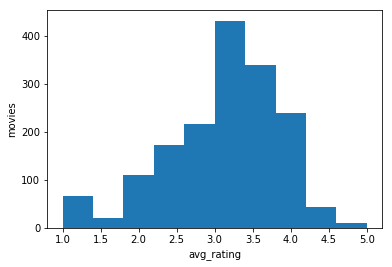

item_id  rating
   1189     5.0
   1653     5.0
   1599     5.0


In [47]:
import matplotlib.pyplot as plt



_ = plt.hist(df_for_histogram['rating'])
_ = plt.xlabel('avg_rating')
_ = plt.ylabel('movies')
plt.show()

print df_for_histogram.sort_values(by='rating',ascending=False).head(3).to_string(index = False)

In [99]:
df_train_users = pd.read_csv(".\\ml-100k_u1\\u.user",delimiter='|',names=['user_id','age','gender','occupation','zip_code'])

df_train_users_merges = pd.merge(df_train,df_train_users)


mean_ratings = df_train_users_merges.pivot_table('rating',index=['item_id'],columns='gender',aggfunc='mean')

mean_ratings










gender,F,M
item_id,,
1,3.800000,3.925795
2,3.200000,3.177778
3,2.538462,3.096774
4,3.315789,3.586466
5,3.882353,3.115385
6,3.500000,3.375000
7,3.593750,3.851852
8,4.018519,3.983193
9,3.840580,3.830508
